In [1]:
import numpy as np
import pandas as pd

In [2]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=None, error_bad_lines=True, warn_bad_lines=True, skipfooter=0, doublequote=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)
    Read CSV (comma-separated) file into DataFrame
    
    Also supports optionally itera

In [18]:
data1 = pd.read_csv('DATA_for_visualization/data_v1_for_t-SNE__R50_e3_n2_nd1000.dat', sep = '\t', header = None)
data1.columns = ['x1','x2','x3','x4','x5']
color1 = pd.read_csv('DATA_for_visualization/color_v1_for_t-SNE__R50_e3_n2_nd1000.dat', sep = '\t', header = None)
color1 = color1.values.flatten()
#data1['y'] = color1

In [19]:
print(color1.shape)

(1000,)


In [4]:
data1.head()

,x1,x2,x3,x4,x5
0,21.508,-32.514,-51.861,-28.455,-8.882
1,9.886,-11.606,-21.953,-19.338,-2.747
2,36.548,-21.188,-46.424,-10.763,-2.112
3,-0.808,-0.872,-8.373,-38.594,-7.829
4,37.563,27.401,16.005,-18.521,-9.128


In [5]:
data1.describe()

,x1,x2,x3,x4,x5
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,16.825300,2.939053,-11.190577,-12.700631,-7.756682
std,19.490307,14.493572,17.224971,15.759366,4.590554
min,-12.487000,-33.821000,-57.960000,-50.200000,-19.483000
25%,1.105250,-7.611000,-22.071500,-24.575250,-10.953500
50%,11.102500,3.499500,-6.614500,-6.236000,-7.677500
75%,27.296000,13.362500,-0.733250,-0.687500,-4.607750
max,68.887000,35.175000,23.463000,11.328000,8.499000


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
help(sns.pairplot)

Help on function pairplot in module seaborn.axisgrid:

pairplot(data, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, dropna=True, plot_kws=None, diag_kws=None, grid_kws=None, size=None)
    Plot pairwise relationships in a dataset.
    
    By default, this function will create a grid of Axes such that each
    variable in ``data`` will by shared in the y-axis across a single row and
    in the x-axis across a single column. The diagonal Axes are treated
    differently, drawing a plot to show the univariate distribution of the data
    for the variable in that column.
    
    It is also possible to show a subset of variables or plot different
    variables on the rows and columns.
    
    This is a high-level interface for :class:`PairGrid` that is intended to
    make it easy to draw a few common styles. You should use :class:`PairGrid`
    directly if you need more flexibility.
    

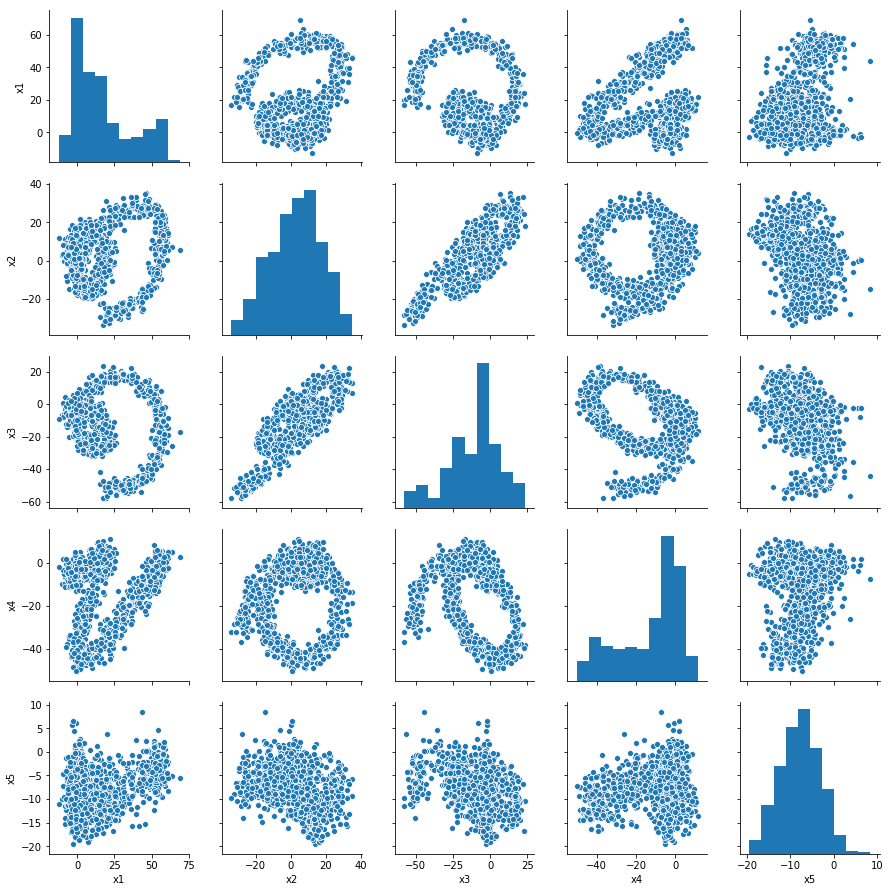

In [8]:
sns.pairplot(data1)
plt.show()

In [9]:
plt.close()

In [10]:
v = data1.values
v.shape

(1000, 5)

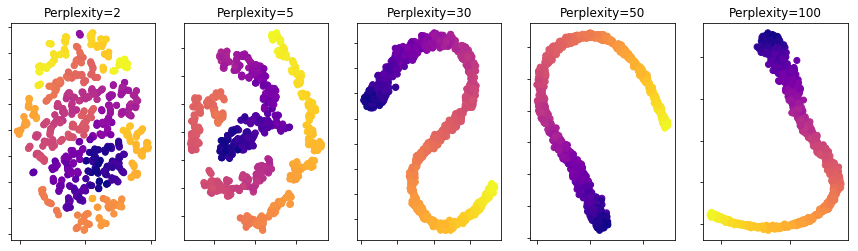

In [21]:
plt.close()
from sklearn import manifold, datasets
from matplotlib.ticker import NullFormatter

perplexities = [2, 5, 30, 50, 100]
n_components = 2
n_samples =  data1.shape[0]

(fig, subplots) = plt.subplots(1, 5, figsize=(15, 4))

for i, perplexity in enumerate(perplexities):
    
    ax = subplots[i]
    
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(data1.values)
    
    ax.set_title("Perplexity=%d" % perplexity)
    
    ax.scatter(Y[:,0], Y[:,1], c = color1, cmap = 'plasma')
    #ax.scatter(Y[green, 0], Y[green, 1], c="g")
    # removes ticks from axis
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')

plt.show()

In [14]:
# https://distill.pub/2016/misread-tsne/